# MSc koodivihik LDA ja LR  
 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cal_methods_slim 
import tqdm

In [2]:
def softmax(X, t):
    return np.exp(X/t) / np.sum(np.exp(X/t), axis=0)  

In [505]:
import pickle
path ="./logits_markus/logits_resnet_wide32_c10_seed7_train.p" 
path3 = "./logits_markus/logits_densenet40_c10_seed7_train.p"
path4 = ".\logits_markus\logits_resenet110_c10_seed7_train.p"
path2 = ".\logits_markus\logits_resnet_wide32_c10_seed7_logits.p"
path5 = ".\logits_markus\logits_resenet110_c10_seed7_val_test.p"
path6 = ".\logits_markus\logits_densenet40_c10_seed7_val_test.p"
with open(path3, mode='rb') as f:
    train1 = pickle.load(f)
with open(path6, mode='rb') as f:
    train2 = pickle.load(f)

In [506]:
# path3 and path6
print(len([1]))
logits_inp_test = np.concatenate((train2[0][0], train2[1][0]))

y_test = np.concatenate((train2[0][1].T[0], train2[1][1].T[0]))
logits_inp = train1[0]
y = np.argmax(train1[1], axis = 1)
print(y_test)
print(logits_inp)

1
[9 8 6 ... 6 7 5]
[[  1.1773759  22.51278   -18.780281  ...  -5.1215844   1.7288295
   37.037743 ]
 [  7.1501765  44.996456   -6.372665  ...  -6.68557     2.4653437
   11.720306 ]
 [-11.649708   -5.3860245  -1.7420064 ...  -9.930166   -6.4453964
   -7.175438 ]
 ...
 [-13.746965  -20.174799  -12.274077  ...  31.693218   -5.2431355
   -9.236124 ]
 [ -3.2265434  -5.102755   -4.2559934 ... -10.609264  -10.135638
    5.514063 ]
 [-20.498888    4.3247313  -0.5355805 ...  41.468723  -13.03753
  -15.612078 ]]


In [487]:
# path4 and path5
print(len([1]))
logits_inp_test = np.concatenate((train2[0][0], train2[1][0]))

y_test = np.concatenate((train2[0][1].T[0], train2[1][1].T[0]))
logits_inp = train1[0]
y = np.argmax(train1[1], axis = 1)
print(y)
print(logits_inp_test)

1
[9 1 5 ... 7 3 7]
[[ 7.0470877   1.3343426  -4.1668267  ... -0.9529842  -7.614627
  -0.45449024]
 [10.592493    2.311489    0.73091114 ... -3.8843844   9.5043
  -1.9560282 ]
 [-3.3678634   1.6656929   0.03285068 ... -5.583242    3.693702
  -4.226036  ]
 ...
 [-2.3051002  -0.7806834  -1.3525612  ... -6.5463     -0.8255062
   1.044678  ]
 [ 0.04893029  1.7954541  -2.5864964  ... 17.685938   -5.238975
  -1.2230792 ]
 [ 3.762145   -1.8695228   5.088201   ... -7.056658    1.9371216
  -4.866541  ]]


In [169]:
#path ja path2 ja cls = 2
print(len([1]))
logits_inp_test = np.concatenate((train2[0][0], train2[1][0]))

y_test = np.concatenate((train2[0][1].T[0], train2[1][1].T[0]))
logits_inp = train1[0]
y = np.argmax(train1[1], axis = 1)
print(y_test)
print(logits_inp)

1
[9 8 6 ... 6 7 5]
[[-0.9962356   6.0488133  -3.1525116  ... -2.683036   -3.573098
  25.078178  ]
 [-5.24501    15.128748    0.9256798  ...  2.7255585  -5.2463584
   1.614687  ]
 [-5.4303064  -2.0653055  -1.7829567  ... -0.3376919  -2.5514672
  -3.7231746 ]
 ...
 [-3.3072188  -3.9025521  -0.34476647 ... 11.365279   -2.927793
  -1.8316866 ]
 [-3.237963   -3.2045727  -5.9130435  ... -2.7432692  -6.15644
   2.2221372 ]
 [-2.2577138   0.02601337 -2.1029277  ... 13.513018   -1.1963181
  -0.68173605]]


In [507]:
from sklearn.preprocessing import label_binarize
import numpy as np

Y_bin = label_binarize(y, classes=range(10))

cls = 3
logits_1d = logits_inp[:, cls]
logits_9d = np.delete(logits_inp, cls, axis=1)
Y_1d = Y_bin[:, cls]
logits_9d = np.array(logits_9d, dtype=np.float64)
rest_1d = np.log(np.sum(np.exp(logits_9d), axis=1))
#logits_1d -= rest_1d
        
input = logits_1d - rest_1d

In [508]:
Y_1d_test

array([0, 0, 0, ..., 0, 0, 0])

In [509]:
Y_bin_test = label_binarize(y_test, classes=range(10))
logits_1d_test = logits_inp_test[:, cls]
logits_9d_test = np.delete(logits_inp_test, cls, axis=1)
Y_1d_test = Y_bin_test[:, cls]
logits_9d_test = np.array(logits_9d_test, dtype=np.float64)
rest_1d_test = np.log(np.sum(np.exp(logits_9d_test), axis=1))
#logits_1d_test -= rest_1d_test
        
input_test = logits_1d_test - rest_1d_test

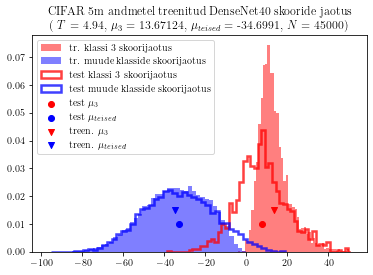

In [511]:
mudel = "DenseNet40"
test = 4
y_val = y
#vahe = andmed_te.T[0] - andmed_te.T[1]
vahe = input 
plt.hist(vahe[y_val == cls], 50, alpha = 0.5, density = True, color = "red", label = "tr. klassi %s skoorijaotus"%(cls))
plt.hist(vahe[y_val != cls], 50, alpha = 0.5, density = True, color = "blue", label = "tr. muude klasside skoorijaotus")
#plt.hist(vahe[y_val == 9], 50, alpha = 0.5, density = True, color = "green")
a, b = np.mean(vahe[y_val == cls]), np.mean(vahe[y_val != cls])

y2 = y_test.copy()
vahe = input_test 
plt.hist(vahe[y2 == cls], 50, alpha = 0.75, density = True,color = "red", histtype = "step", linewidth=2.5, label = "test klassi %s skoorijaotus"%(cls))
plt.hist(vahe[y2 != cls], 50, alpha = 0.75,density = True, color = "blue", histtype = "step", linewidth=2.5, label = "test muude klasside skoorijaotus")
c, d = np.mean(vahe[y2 == cls]), np.mean(vahe[y2 != cls])

temperature = cal_methods_slim.TemperatureScaling()
con_logits = np.concatenate(( rest_1d_test.reshape(-1,1),logits_1d_test.reshape(-1,1)),axis = 1)

temperature.fit(con_logits, Y_1d_test)
tempp = temperature.temp

#plt.hist(andmed_te, 30,density = True,alpha = 0.5, color = "red")
#plt.hist(andmed_te.T[1], 30, density = True,alpha = 0.5,color = "blue")
#a, b = np.mean(np.min(andmed_te, axis = 1)), np.mean(np.max(andmed_te, axis = 1))
#a, b = np.mean(andmed_te.T[0]), np.mean(andmed_te.T[1])
plt.scatter(c,0.01,color = "red", label = "test $\mu_3$")
plt.scatter(d,0.01,color = "blue", label = "test $\mu_{teised}$")
plt.scatter(a,0.015,color = "red", marker = "v", label = "treen. $\mu_3$")
plt.scatter(b,0.015,color = "blue", marker = "v", label = "treen. $\mu_{teised}$")

plt.legend()
plt.title("CIFAR 5m andmetel treenitud %s skooride jaotus\n ( $T$ = %s, $\mu_3$ = %s, $\mu_{teised}$ = %s, $N$ = %s)" % (mudel, np.round(tempp,2), np.round(a,5),np.round(b,5), len(input)))
plt.savefig("CIFR_5m_skoorid%s_%s.png" % (test,cls), bbox_inches='tight', dpi = 300)
plt.show()

C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/1986190416.py:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq0, proba0 = np.histogram(meta1, binners, normed = True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/1986190416.py:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq1, proba1 = np.histogram(meta2, binners, normed = True)


4.039921870646243


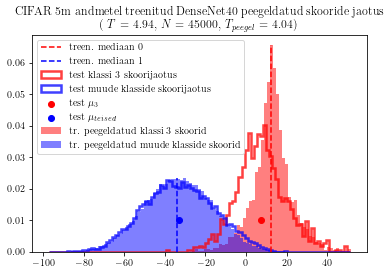

In [512]:
test = 4
y_tr = y.copy()
vahe = input 
_, binners = np.histogram(vahe, 100)
m0 = np.median(vahe[y_tr == cls ])
m1 = np.median(vahe[y_tr != cls])

meta1 = vahe[y_tr == cls]
meta2 = vahe[y_tr != cls]

meta1 = meta1[meta1 > m0]
meta2 = meta2[meta2 < m1]

meta1 = np.concatenate((meta1 - 2*np.abs(meta1 - m0), meta1))
meta2 = np.concatenate((meta2, meta2 + 2*np.abs(m1 - meta2)))
freq0, proba0 = np.histogram(meta1, binners, normed = True)
freq1, proba1 = np.histogram(meta2, binners, normed = True)
freq0 = np.concatenate((np.array([0]),freq0))
freq1 = np.concatenate((np.array([0]),freq1))

#sampling for temp.
shape = 15_000
samples0 = np.random.choice(proba0, size = shape, p = freq0/sum(freq0))
samples1 = np.random.choice(proba1, size = shape, p = freq1/sum(freq1))
samples0 = np.vstack((np.ones(shape), np.ones(shape) + samples0)).T
samples1 = np.vstack((np.ones(shape), np.ones(shape) + samples1)).T
sampled_logits = np.concatenate((samples0, samples1))
samples_y = np.concatenate((np.ones(shape), np.zeros(shape)))
temperature = cal_methods_slim.TemperatureScaling()
temperature.fit(sampled_logits, samples_y)
tempp_peegel = temperature.temp
print(tempp_peegel)

plt.bar(binners, freq0,binners[1] - binners[0], alpha = 0.5, color = "red", label = "tr. peegeldatud klassi 3 skoorid")
plt.bar(binners, freq1,binners[1]-binners[0], alpha = 0.5, color = "blue", label = "tr. peegeldatud muude klasside skoorid")
a, b = m0, m1 

y2 = y_test.copy()
vahe = input_test 
plt.hist(vahe[y2 == cls], binners, alpha = 0.75, density = True,color = "red", histtype = "step", linewidth=2.5, label = "test klassi %s skoorijaotus"%(cls))
plt.hist(vahe[y2 != cls], binners, alpha = 0.75,density = True, color = "blue", histtype = "step", linewidth=2.5, label = "test muude klasside skoorijaotus")
c, d = np.mean(vahe[y2 == cls]), np.mean(vahe[y2 != cls])
plt.plot([m0,m0], [0,np.max(freq0)], color= "red",label= "treen. mediaan 0", ls = "--")
plt.plot([m1,m1], [0,np.max(freq1)], color = "blue", label= "treen. mediaan 1", ls = "--")
  
temperature = cal_methods_slim.TemperatureScaling()
con_logits = np.concatenate(( rest_1d_test.reshape(-1,1),logits_1d_test.reshape(-1,1)),axis = 1)

temperature.fit(con_logits, Y_1d_test)
tempp = temperature.temp

#plt.hist(andmed_te, 30,density = True,alpha = 0.5, color = "red")
#plt.hist(andmed_te.T[1], 30, density = True,alpha = 0.5,color = "blue")
#a, b = np.mean(np.min(andmed_te, axis = 1)), np.mean(np.max(andmed_te, axis = 1))
#a, b = np.mean(andmed_te.T[0]), np.mean(andmed_te.T[1])
plt.scatter(c,0.01,color = "red", label = "test $\mu_3$")
plt.scatter(d,0.01,color = "blue", label = "test $\mu_{teised}$")
#plt.scatter(a,0.02,color = "red", marker = "v", label = "tr. $\mu_3$")
#plt.scatter(b,0.02,color = "blue", marker = "v", label = "tr. $\mu_{teised}$")


plt.legend()
plt.title("CIFAR 5m andmetel treenitud %s peegeldatud skooride jaotus\n ( $T$ = %s, $N$ = %s, $T_{peegel}$ = %s)" % (mudel, np.round(tempp,2), len(input), np.round(tempp_peegel,3)))
plt.savefig("CIFR_5m_skoorid_peegeldatud%s_%s.png" % (test,cls), bbox_inches='tight', dpi = 300)
plt.show()




[ -0.69316733 -10.11968028]


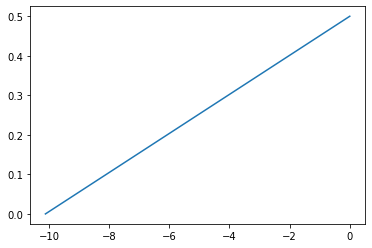

In [3]:
def sigmoid(X,t):
    return 1/(1+ np.exp(-X/t))

X = np.array([-4.029355e-05 ,-1.011964e+01])
t = 1
plt.plot(X,sigmoid(X,t))
print(np.log(sigmoid(X,1)))

In [788]:
def rel_diag(bins, data, true, title = "", supress = False, title_save = ""):
    # data on shape = (n, classes)
    #pred = np.argmax(data, axis = 1)
    massimo = data[1] 
    #true = np.concatenate((true, true))
    acc = []
    conf = []
    prec_conf = []
    ratios = []
    for i in range(bins):
        selection = (massimo > i/bins) * (massimo <= (i+1)/bins)
        ratio = max([sum(selection),1])
        acc.append(sum(true[selection])/ratio)
        conf.append((i)/bins)
        prec_conf.append(sum(massimo[selection])/ratio)
        ratios.append(sum(selection)/len(massimo))
    #massimo = data.reshape((1,-1))[0]
    subs = abs(np.array(acc) - np.array(prec_conf))
    ece = np.round(sum(subs*np.array(ratios)),3)
    if supress:
        return ece
    #plt.axes(aspect = "equal")
    prec_conf = np.array(prec_conf)
    conf = np.array(conf)
    print(conf, prec_conf)
    
    plt.bar(conf, acc, 1/bins, color = "#3c7dc2",ec = "black",lw = 0.5, align = "edge", label = "Mudeli väljund", zorder = 0.0)
    plt.xlabel("Positiivsesse klassi ennustatud tõenäosus")
    plt.ylabel("Positiivse klassi osakaal ennustustes")
    plt.title(title + "Usaldusväärsusdiagramm, kus ECE = %s" % (ece))
    plt.plot([0,1],[0,1], color = "blue", ls = "--")
    plt.bar(prec_conf - 1/(bins*6), subs*(acc < prec_conf), 1/(bins*3), acc*(acc < np.linspace(1/bins,1,bins)), align = "edge",color = "pink", edgecolor = "#ff6666", linestyle = "--", label = "Erinevus", zorder = 1.0)
    plt.bar(prec_conf - 1/(bins*6), -subs*(acc > prec_conf) ,1/(bins*3), acc , color = "pink",edgecolor = "#ff6666",align = "edge", linestyle="--", zorder = 1.0)
    plt.scatter(prec_conf[prec_conf!=0], np.array(acc)[prec_conf!=0], marker = "+", alpha = 1,color = "red", zorder= 2.0)
    #plt.bar(conf, subs, 1/10, acc[acc > np.linspace(1/bins,1,bins)], color = "pink", zorder = 1.0)
    #print(acc,conf)
   
    plt.legend()
    if title_save != "":
        plt.savefig("%s.png" % (title_save), dpi = 300)
    plt.show()
    plt.clf()
    return ece

In [7]:
def to_logits(probs):
    logits = np.log(probs)
    return logits

In [ ]:
def to_logits2(probs):
    return np.log(probs/(1-probs))

X = np.linspace(0,1,200)
plt.plot(X,to_logits(X), color = "red")
plt.plot(X, to_logits2(X), color = "pink")
print(np.log(sigmoid(X,1)))

*visualisatsiooni test*

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333] [0.  0.  0.  0.6 0.8 0. ]


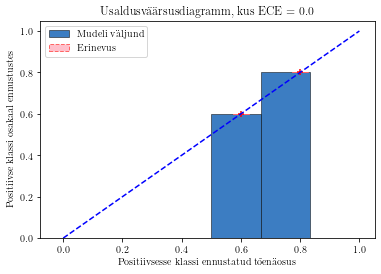

[1 0 0 1 0 1 1 0 1 1 1 0 0 0 0]
[1.]


<Figure size 432x288 with 0 Axes>

In [791]:
probs = np.array([0.4,0.4,0.4,0.4,0.4,0.8,0.8,0.8,0.8,0.8])
probs2 = np.array([[0.6,0.6,0.6,0.6,0.6,0.2,0.2,0.2,0.2,0.2,0.8,0.8,0.8,0.8,0.8],
                    [0.4,0.4,0.4,0.4,0.4,0.8,0.8,0.8,0.8,0.8,0.2,0.2,0.2,0.2,0.2]])
true = np.array([1,0,0,1,0,1,1,0,1,1,1,0,0,0,0])
probs4 = np.array([[0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.2,0.2],[0.6,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,0.8]])
true3 = np.array([1,1,1,0,0,1,1,0,1,1])
probs3 = np.array([[0.97827786, 0.99295634 ,0.9356956 , 0.9952619,  0.5999002 , 0.848446,
  0.40463924, 0.85137427 ,0.6990412  ,0.9869615  ,0.98293614, 0.84842247,
  0.00400752, 0.11782753 ,0.03792864 ,0.08061224 ,0.04601997 ,0.00590181,
  0.1184901 , 0.01740479 ,0.11177778 ,0.07695746 ,0.02960116, 0.03856003],
 [0.02172211, 0.00704365 ,0.06430442 ,0.0047381  ,0.4000998  ,0.15155402,
  0.59536076, 0.1486257  ,0.3009588  ,0.01303854 ,0.01706385 ,0.15157755,
  0.9959925  ,0.88217247 ,0.96207136, 0.91938776 ,0.95398   , 0.9940982,
  0.8815099 , 0.9825952  ,0.8882222,  0.92304254 ,0.97039884, 0.96143997]])
true2 = np.array([0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0 ,1 ,1 ,1, 1, 1, 1 ,1 ,1 ,1, 1, 1, 1])
rel_diag(6, probs4, true3, title_save="näide_1")
#temperature = TemperatureScaling()
#temperature.fit(probs2.T , true)
#print(1/np.exp(temperature.temperature[0]))
logits_test = to_logits(probs4)

tmp_model = cal_methods_slim.TemperatureScaling()
fit_tmp = tmp_model.fit(logits_test.T, true3)
print(true)
print(fit_tmp.x)
probs5 = tmp_model.predict(logits_test.T)
plt.clf()
#rel_diag(10, probs5.T, true3, title_save="näide_5")


## LDA


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
def LDA_yks_tunnus(x,w,b):
    pos =  1/(1 + np.exp(-(w*x + b)))
    return [1-pos, pos]

In [11]:
def wb(d1,d2, std):
    mu_tilde_1 = np.mean(d1)
    mu_tilde_2 = np.mean(d2)
    #sgm1 = np.std(d1)
    #sgm2 = np.std(d2)
    w = (mu_tilde_2 - mu_tilde_1)/(std**2)
    b = (mu_tilde_1**2 - mu_tilde_2**2)/(2*std**2)
    return (w,b)

In [14]:
from scipy.stats import norm
def kl_div(scores, bins, pic = True, col = "black", lab = ""):
  mu = np.mean(scores)
  std = np.std(scores)
  
  
  hist = np.histogram(scores, bins, normed =True)
  estim = hist[0] 
  buckets = hist[1]
  wid = (buckets[1] - buckets[0])/2
  buckets = buckets[1:] - wid
  etalon = norm.pdf(buckets, mu, std)

  if pic == True:
    plt.plot(buckets, etalon, color = col, label  = lab)

  #print(etalon, estim)
  return np.sum(estim * np.log(estim  / etalon, where = estim != 0))


100%|██████████| 1/1 [24:42<00:00, 1482.85s/it]


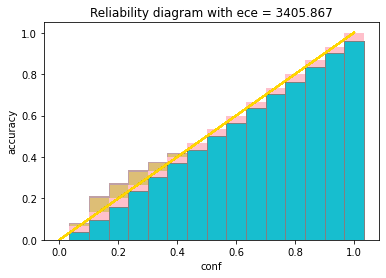

In [30]:
n = 50
res = []
#nxs = [2,4,8,16,32,64,128, 256, 512]
nxs = [1000, 10000, 100000 ] 

#nxs = [2,4,8,16,32,64,128,256, 512, 1024, 2048, 4096, 8000]
ny = 10000
t = []
eps1 = []
eps2 = []
avg_res = []
median_res = []
eces = []
avg_eces_enne = []
avg_eces_prst = []
ratios = []
avg_tr_acc = []
avg_te_acc = []
avg_mu_1 = []
avg_mu_2 = []
avg_loss_enne = []
avg_loss_prst = []

for nx in tqdm.tqdm(nxs):
    res = []
    eces_enne = []
    tr_acc = []
    te_acc = []
    eces_prst = []
    loss_enne = []
    loss_prst = []
 
    for i in range(n):

        #ind = np.random.randint(0, len(X_train), nx)
        #samp_x = X_train[ind]
        #samp_y = y_train[ind]

        samp_1 = np.random.choice(distr_1, nx)
        samp_2 = np.random.choice(distr_2, nx)
        val_y = np.concatenate((np.zeros(ny), np.ones(ny)))
        tr_y = np.concatenate((np.zeros(nx),np.ones(nx)))
        test_y = np.concatenate((np.zeros(ny), np.ones(ny)))
        avg_mu_1.append(np.mean(samp_1))
        avg_mu_2.append(np.mean(samp_2))

        
        #val_1 = samp_1
        #val_2 = samp_2
        #val_y = tr_y
        #samp_1 = samp_x[samp_y == 0]
        #samp_2 = samp_x[samp_y == 1]
        w,b = wb(samp_1, samp_2, sgm)
        confidences = np.array(LDA_yks_tunnus(np.concatenate((val_1,val_2)), w, b))
        confidences_tr = np.array(LDA_yks_tunnus(np.concatenate((samp_1,samp_2)), w, b))
        confidences_te =  np.array(LDA_yks_tunnus(np.concatenate((test_1,test_2)), w, b))
        logits = to_logits(confidences)
        logits_test = to_logits(confidences_te)
        temperature = cal_methods_slim.TemperatureScaling()
        #val_y = y_val
        #tr_y = samp_y
        #test_y = y_test
        temperature.fit(logits.T, val_y)
        conf2 = temperature.predict(logits.T)
        #calibrated = temperature.transform(confidences.T) 
        res.append(temperature.temp)
        #print(res[-1], (avg_mu_2[-1] - avg_mu_1[-1]), (np.mean(val_2) - np.mean(val_1)))
        eces_enne.append(rel_diag(15, confidences, val_y))#, title_save="enne_%s_%s" % (nx, i)))
        eces_prst.append(rel_diag(15, conf2.T, val_y))#,  title_save="peale_%s_%s" % (nx, i)))
        te_acc.append(sum(np.argmax(confidences, axis=0) == val_y)/len(val_y))
        tr_acc.append(sum(np.argmax(confidences_tr, axis=0) == tr_y)/len(tr_y))
        loss_enne.append(temperature._loss_fun(1, logits_test.T, test_y))
        loss_prst.append(temperature._loss_fun(None, logits_test.T, test_y) )
        #t.append(np.mean(distr_1)/mu_1)
        #eps1.append(mu_1 - np.mean(distr_1))
        #eps2.append(mu_2 - np.mean(distr_2))
        #print(tr_acc[-1], te_acc[-1])
    
    #print(sum((np.array(avg_mu_2)-np.array(avg_mu_1)) > ))
    #avg_mu_1 = []
    #avg_mu_2 = []
    avg_loss_enne.append(np.mean(np.array(loss_enne)))
    avg_loss_prst.append(np.mean(np.array(loss_prst)))
    avg_res.append(np.mean(np.array(res)))
    avg_eces_enne.append(np.mean(np.array(eces_enne)))
    avg_eces_prst.append(np.mean(np.array(eces_prst)))
    ratios.append(np.mean(np.array(res) > 1))
    avg_te_acc.append(np.mean(np.array(te_acc)))
    avg_tr_acc.append(np.mean(np.array(tr_acc)))
    median_res.append(np.median(np.array(res)))

#print(sum(np.array(t)-np.array(res))/n, sum(eps1)/n, sum(eps2)/n) 

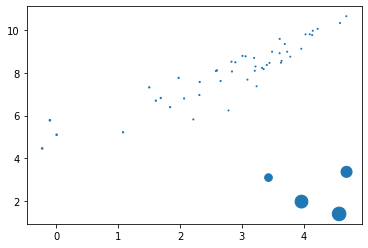

In [917]:
vl = np.mean(val_1)
vr = np.mean(val_2)
ll = []
ts = []
lr = []
for t, l,r in zip(res, avg_mu_1, avg_mu_2):
    if l - vl < 0 and vr - r > 0 and r - l < abs(vl- vr) and t > 1:
        #print(l, r, t , r-l, vl - vr)
        ll.append(l)
        lr.append(r)
        ts.append(t)

plt.scatter(ll,lr, s = ts, label=ts)

In [15]:
def LDA(x,w,b):
    pos =  1/(1 + np.exp(-(x.dot(w) + b)))
    return [1-pos, pos]

In [16]:
def wb_multi(d1, d2, std):
    mu_tilde_1 = np.mean(d1, axis = 0)
    mu_tilde_2 = np.mean(d2, axis = 0)
    #sgm1 = np.std(d1)
    #sgm2 = np.std(d2)
    #print(mu_tilde_1,mu_tilde_2)
    inv = np.linalg.inv(std)
    w = inv.dot(mu_tilde_2 - mu_tilde_1)
    b = w.dot(mu_tilde_1 + mu_tilde_2) * 0.5
    return (w,b)

In [17]:
def osakaalu_histo(res, title):
    hi = np.histogram(res, bins = [0,1,2,3,4,5,6,1000] )
    osakaal =  1 - hi[0][0]/sum(hi[0])
    print("Liig-enesekindlate osakaal (lävend 1): ", 1 - hi[0][0]/sum(hi[0]))
    plt.bar(hi[1][:-1], hi[0]/sum(hi[0]),align= "edge", color = "grey")
    plt.title("Histogramm üle temperatuuride, ($T \geq 1$ osakaal: %s)" % (osakaal))
    plt.plot([1,1], [0,1], color = "pink", lw = 2)
    #plt.plot([2,2], [0,1], color = "red")
    plt.xlabel("$T$")
    plt.ylabel("osakaal")
    plt.savefig("LDA_%s.png" % (title), dpi = 300)
    plt.clf()

In [590]:
## data generation
N = 100000
epsilon = 0
n_feat = 10
ny = 50_000
nt = 5000
#mu_1, mu_2 = np.array([1,-1]), np.array([-1,1])
#mu_1, mu_2 = np.random.randint(-5,5, n_feat), np.random.randint(-10,10,n_feat)
mu_1 = np.random.choice([-1,1], n_feat)
mu_2 =  np.random.choice([-1,1], n_feat)
#mu_2 = - mu_1
sgm = np.identity(n_feat)*(n_feat/3)
#sgm = np.array([[1,0],[0,1]])


#sgm = np.identity(len(mu_1)) * np.random.randint(1, 50, len(mu_1))

distr_1 = np.random.multivariate_normal(mu_1 , sgm, N) #negatives
val_1 =  np.random.multivariate_normal(mu_1 + epsilon, sgm, ny)
test_1 = np.random.multivariate_normal(mu_1 + epsilon, sgm, nt)

test_2 = np.random.multivariate_normal(mu_2 + epsilon, sgm, nt)
val_2 =  np.random.multivariate_normal(mu_2 + epsilon, sgm, ny) #positives
distr_2 = np.random.multivariate_normal(mu_2 , sgm, N)


y_val = np.concatenate((np.zeros(ny), np.ones(ny)))
y_train = np.concatenate((np.zeros(N),np.ones(N)))
y_test= np.concatenate((np.zeros(nt), np.ones(nt)))
X_train = np.concatenate((distr_1,distr_2))
X_test = np.concatenate((test_1,test_2))
X_val = np.concatenate((val_1, val_2))

In [591]:
n = 1
res = []
#nxs = [4,8,16,32,64,128,256, 512]
#nxs = [512, 1024, 2048, 4096]
#nxs = [100,150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 5000] 
nxs = [1000, 2000,  3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000] 


eps1 = []
eps2 = []
avg_res = []
median_res = []
eces = []
avg_eces_enne = []
avg_eces_prst = []
ratios = []
avg_tr_acc = []
avg_te_acc = []
avg_loss_enne = []
avg_loss_prst = []
y_samps = []
distr_of_scores_tr = []
distr_of_scores_te = []
weights = []
biases = []
ratios_bigger = []
scores_tr_max = []
scores_tr_min = []
scores_te_max = []
scores_te_min = []
scores_ca_max = []
scores_ca_min = []
kl_tr_1 = []
kl_tr_0 = []
kl_te_1 = []
kl_te_0 = []
kl_ca_1 = []
kl_ca_0 = []
jt = 0
cc_alter= []
for j in tqdm.tqdm(range(len(nxs))):
    n_true = n
    nx = nxs[j]
    res = []
    eces_enne = []
    tr_acc = []
    te_acc = []
    eces_prst = []
    loss_enne = []
    loss_prst = []

    for i in range(n):
        #samp_1 = distr_1[np.random.randint(0,len(distr_1),nx)]
        #samp_2 = distr_2[np.random.randint(0,len(distr_2),nx)]
        
        #ind = np.random.randint(0, len(X_train), nx)
        #samp_x = X_train[ind]
        #samp_y = y_train[ind]

        ind_1 = np.random.randint(0, len(X_train)//2, nx//2)
        ind_2 = np.random.randint(len(X_train)//2, len(X_train), nx//2)
        ind = np.concatenate((ind_1,ind_2))
        #ind = np.random.randint(0, len(X_train), nx)
        samp_x = X_train[ind]
        samp_y = y_train[ind]
       #        samp_1 = np.random.choice(distr_1, nx)
#        samp_2 = np.random.choice(distr_2, nx)
#        val_y = np.concatenate((np.zeros(ny), np.ones(ny)))
#        tr_y = np.concatenate((np.zeros(nx),np.ones(nx)))
#        test_y = np.concatenate((np.zeros(ny), np.ones(ny)))

#        clf = LinearDiscriminantAnalysis().fit(np.concatenate((samp_1,samp_2)).reshape((-1,1)), tr_y)
#        confidences = clf.predict_proba(np.concatenate((val_1,val_2)).reshape((-1,1)))
#        confidences_tr = clf.predict_proba(np.concatenate((samp_1, samp_2)).reshape((-1,1))) 
#        confidences_te = clf.predict_proba(np.concatenate((test_1,test_2)).reshape((-1,1)))

#        logits = to_logits(confidences)
#        logits_test = to_logits(confidences_te)
#        temperature = cal_methods_slim.TemperatureScaling()
#        temperature.fit(logits, val_y)
#        conf2 = temperature.predict(logits)
        
        clf = LinearDiscriminantAnalysis().fit(samp_x, samp_y)

        confidences = clf.predict_proba(X_val)
        confidences_tr = clf.predict_proba(samp_x) 
        confidences_te = clf.predict_proba(X_test)
        logits = to_logits(confidences)
        logits_test = to_logits(confidences_te)
        logits_train = to_logits(confidences_tr)
        temperature = cal_methods_slim.TemperatureScaling()
        temp_train = cal_methods_slim.TemperatureScaling()
        try:
            temperature.fit(logits, y_val)
            #temp_train.fit(logits_train, samp_y)
            conf2 = temperature.predict(logits)
            dd_te = logits
            dd_tr = logits_train
            dd_ca = logits/temperature.temp
            #samp = np.argmax(confidences_tr,axis=1)
            #val = np.argmax(confidences,axis=1)
            vahe_tr_1_buf = (dd_tr.T[0] - dd_tr.T[1])[samp_y== 1]
            vahe_tr_0_buf = (dd_tr.T[0] - dd_tr.T[1])[samp_y== 0]
            vahe_te_1_buf = (dd_te.T[0] - dd_te.T[1])[y_val == 1]
            vahe_te_0_buf = (dd_te.T[0] - dd_te.T[1])[y_val == 0]
            vahe_ca_1_buf = (dd_ca.T[0] - dd_ca.T[1])[y_val == 1]
            vahe_ca_0_buf = (dd_ca.T[0] - dd_ca.T[1])[y_val == 0]
      
            inni = (np.inf in logits) or (np.inf in logits_train) or (-np.inf in logits_train) or (-np.inf in logits)
           
            if (i == 0 or len(biases)==0) and inni == False:
                weights.append(clf.coef_/n)
                biases.append(clf.intercept_ / n)
                distr_of_scores_te.append(logits)
                distr_of_scores_tr.append(logits_train)
                

                scores_tr_max.append(np.mean(vahe_tr_1_buf))
                scores_tr_min.append(np.mean(vahe_tr_0_buf))
                scores_te_max.append(np.mean(vahe_te_1_buf))
                scores_te_min.append(np.mean(vahe_te_0_buf))
                scores_ca_max.append(np.mean(vahe_ca_1_buf))
                scores_ca_min.append(np.mean(vahe_ca_0_buf))
    
                kl_tr_1.append(kl_div(vahe_tr_1_buf, 50, pic = False))
                kl_tr_0.append(kl_div(vahe_tr_0_buf, 50, pic = False))
                kl_te_1.append(kl_div(vahe_te_1_buf, 50, pic = False))
                kl_te_0.append(kl_div(vahe_te_0_buf, 50, pic = False))
                kl_ca_1.append(kl_div(vahe_ca_1_buf, 50, pic = False))
                kl_ca_0.append(kl_div(vahe_ca_0_buf, 50, pic = False))

            elif inni == False:
                weights[jt] += clf.coef_ 
                biases[jt] += clf.intercept_ 
                distr_of_scores_te[jt] += logits
                distr_of_scores_tr[jt] = np.array([np.concatenate((distr_of_scores_tr[jt].T[0], dd_tr.T[0])),
                                            np.concatenate((distr_of_scores_tr[jt].T[1], dd_tr.T[1]))]).T



                scores_tr_max[jt] += np.mean(vahe_tr_1_buf)
                scores_tr_min[jt] += np.mean(vahe_tr_0_buf)
                scores_te_max[jt] += np.mean(vahe_te_1_buf)
                scores_te_min[jt] += np.mean(vahe_te_0_buf)
                scores_ca_max[jt] += np.mean(vahe_ca_1_buf)
                scores_ca_min[jt] += np.mean(vahe_ca_0_buf)
    
                kl_tr_1[jt] += (kl_div(vahe_tr_1_buf, 50, pic = False))
                kl_tr_0[jt] += (kl_div(vahe_tr_0_buf, 50, pic = False))
                kl_te_1[jt] += (kl_div(vahe_te_1_buf, 50, pic = False))
                kl_te_0[jt] += (kl_div(vahe_te_0_buf, 50, pic = False))
                kl_ca_1[jt] += (kl_div(vahe_ca_1_buf, 50, pic = False))
                kl_ca_0[jt] += (kl_div(vahe_ca_0_buf, 50, pic = False))
            else:
                n_true -= 1
                
        except:
            n_true -= 1
         
        #w,b = wb_multi(samp_1, samp_2, sgm)
        #confidences = np.array(LDA(np.concatenate((val_1, val_2)), w, b))
        #confidences_tr = np.array(LDA(np.concatenate((samp_1, samp_2)), w, b))
        #logits = to_logits(confidences)
        #temperature = cal_methods_slim.TemperatureScaling()
        #temperature.fit(logits.T, val_y)
        #conf2 = temperature.predict(logits.T)
        #calibrated = temperature.transform(confidences.T) 
        res.append(temperature.temp)
        loss_enne.append(temperature._loss_fun(1, logits_test, y_test))
        loss_prst.append(temperature._loss_fun(None, logits_test, y_test) )
        #eces_enne.append(rel_diag(10, confidences, y_test, supress = True))
        #eces_prst.append(rel_diag(10, conf2, y_test, supress = True))
        #print(np.argmax(confidences_tr,axis=1))
        te_acc.append(clf.score(X_val, y_val))
        tr_acc.append(clf.score(samp_x, samp_y))
        #print(temperature.temp)
        #t.append(np.mean(distr_1)/mu_1)
        #eps1.append(mu_1 - np.mean(distr_1))
        #eps2.append(mu_2 - np.mean(distr_2))
    print(n_true)
    y_samps.append(samp_y)
    if n_true != 0:
        weights[jt] = weights[jt]/n_true
        biases[jt] = biases[jt]/n_true
        distr_of_scores_te[jt] = distr_of_scores_te[jt] / n_true
        scores_tr_max[jt] = scores_tr_max[jt]/n_true
        scores_tr_min[jt] = scores_tr_min[jt]/n_true
        scores_te_max[jt] = scores_te_max[jt]/n_true
        scores_te_min[jt] = scores_te_min[jt]/n_true
        scores_ca_max[jt] = scores_ca_max[jt]/n_true
        scores_ca_min[jt] = scores_ca_min[jt]/n_true
        kl_tr_1[jt] = kl_tr_1[jt]/n_true  
        kl_tr_0[jt] = kl_tr_0[jt]/n_true
        kl_te_1[jt] = kl_te_1[jt]/n_true
        kl_te_0[jt] = kl_te_0[jt]/n_true
        kl_ca_1[jt] = kl_ca_1[jt]/n_true
        kl_ca_0[jt] = kl_ca_0[jt]/n_true
        jt += 1
        cc_alter.append(nx)


    avg_loss_enne.append(np.mean(np.array(loss_enne)))
    avg_loss_prst.append(np.mean(np.array(loss_prst)))
    print(np.std(np.array(res)),nx)
    avg_res.append(np.mean(np.array(res)))
    #if nx in [100,500,1000]:
    #    osakaalu_histo(res, "100"+str(nx))
    avg_eces_enne.append(np.mean(np.array(eces_enne)))
    avg_eces_prst.append(np.mean(np.array(eces_prst)))
    res = np.array(res)
    ratios.append(np.mean(res > 1))
    avg_te_acc.append(np.mean(np.array(te_acc)))
    avg_tr_acc.append(np.mean(np.array(tr_acc)))
    median_res.append(np.median(np.array(res)))

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  9%|▉         | 1/11 [00:00<00:04,  2.47it/s]

1
0.0 1000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 18%|█▊        | 2/11 [00:00<00:03,  2.65it/s]

1
0.0 2000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 27%|██▋       | 3/11 [00:01<00:02,  2.74it/s]

1
0.0 3000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 36%|███▋      | 4/11 [00:01<00:02,  2.67it/s]

1
0.0 4000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 45%|████▌     | 5/11 [00:01<00:02,  2.65it/s]

1
0.0 5000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 55%|█████▍    | 6/11 [00:02<00:01,  2.56it/s]

1
0.0 6000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 64%|██████▎   | 7/11 [00:02<00:01,  2.62it/s]

1
0.0 7000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 73%|███████▎  | 8/11 [00:03<00:01,  2.57it/s]

1
0.0 8000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 82%|████████▏ | 9/11 [00:03<00:00,  2.59it/s]

1
0.0 9000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 91%|█████████ | 10/11 [00:03<00:00,  2.72it/s]

1
0.0 10000


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rooben\anaconda3\envs\datas\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

1
0.0 15000


In [360]:
import pickle
def save_nostra_file(nr, tipo, kraam):
    with open('%s_katse_%s.pickle' % (tipo, nr), 'wb') as f:
        pickle.dump(kraam, f)

def read_nostra_file(nr, tipo):
    with open("%s_katse_%s.pickle" % (tipo, nr), "rb") as f:
        return pickle.load(f)

In [372]:
kraam = [avg_loss_enne, avg_loss_prst, avg_res, ratios, avg_te_acc, avg_tr_acc,
 distr_of_scores_tr, distr_of_scores_te, samp_y, median_res, cc_alter, y_samps,
  y_val, scores_tr_max, scores_tr_min, scores_te_max, scores_te_min, scores_ca_max, scores_ca_min,
  kl_tr_1, kl_tr_0, kl_te_1, kl_te_0, kl_ca_1, kl_ca_0]

save_nostra_file(0, "LDA", kraam)

In [374]:
avg_loss_enne, avg_loss_prst, avg_res, ratios, avg_te_acc, avg_tr_acc, distr_of_scores_tr, distr_of_scores_te, samp_y, median_res, cc_alter, y_samps, y_val, scores_tr_max, scores_tr_min, scores_te_max, scores_te_min, scores_ca_max, scores_ca_min, kl_tr_1, kl_tr_0, kl_te_1, kl_te_0, kl_ca_1, kl_ca_0 = read_nostra_file(0, "LDA")

In [561]:
def get_koos_jaotused(data_tr, data_te,i, y_tr ,y_te, title, abbr, tr = False, bins = 50):

  andmed_te = data_tr[i]

  vahe = andmed_te.T[0] - andmed_te.T[1]
  plt.hist(vahe[y_tr == 0], bins,alpha = 0.5, density = True,color = "red", label = "treening 0-klass")
  plt.hist(vahe[y_tr == 1], bins,alpha = 0.5,density = True, color = "blue", label = "treening 1-klass")

  a, b = np.mean(vahe[y_tr == 0]), np.mean(vahe[y_tr == 1])
  andmed_te = data_te[i]
  vahe = andmed_te.T[0] - andmed_te.T[1]
  plt.hist(vahe[y_te == 0], 50,alpha = 0.75, density = True,color = "red", histtype = "step", linewidth=2.5,label = "val. 0-klass")
  plt.hist(vahe[y_te == 1], 50,alpha = 0.75,density = True, color = "blue", histtype = "step", linewidth=2.5,label = "val. 1-klass")
  c, d = np.mean(vahe[y_te == 0]), np.mean(vahe[y_te == 1])

  plt.scatter(c,0.01,color = "darkred",label= "val. $\mu_0$" )
  plt.scatter(d,0.01,color = "blue",label= "val. $\mu_1$")
  plt.scatter(a,0.02,color = "red", marker = "v", label= "treening $\mu_0$")
  plt.scatter(b,0.02,color = "blue", marker = "v", label = "treening $\mu_1$")

  plt.title("%s \n ($T$: %s $N$ = %s, dim = %s)" % (title, np.round(avg_res[i], 2), nxs[i], n_feat))
  plt.legend()
  plt.savefig("%s_skoorid_koos_%s%s.png" % (mod, abbr, test),bbox_inches = "tight", dpi  =300 )
  
  plt.show()
  plt.clf()

In [574]:
def get_jaotus(data,i, y, title, abbr, tr = False, c = 0, d= 0 , bins = 50):

  andmed_te = data[i]

  vahe = andmed_te.T[0] - andmed_te.T[1]
  plt.hist(vahe[y == 0], bins,alpha = 0.5, density = True,color = "red", label = "$0$ klassi skoorijaotus")
  plt.hist(vahe[y == 1], bins,alpha = 0.5,density = True, color = "blue", label = "$1$ klassi skoorijaotus")
  kl_1 = kl_div(vahe[y == 0], bins, col = "red", lab = "$0$ klassi norm. lähend")
  kl_2 = kl_div(vahe[y == 1], bins, col = "blue",lab = "$1$ klassi norm. lähend")

  sd1, sd2 = np.std(vahe[y == 0]), np.std(vahe[y == 1])
  #plt.hist(andmed_te, 30,density = True,alpha = 0.5, color = "red")
  #plt.hist(andmed_te.T[1], 30, density = True,alpha = 0.5,color = "blue")
  a, b = np.mean(vahe[y == 0]), np.mean(vahe[y == 1])
  temp_teor = ((sd1 + sd2)/2)**2/np.abs(b-a)
  #a, b = np.mean(andmed_te.T[0]), np.mean(andmed_te.T[1])
  if tr == True:
    plt.scatter(c,0.01,color = "darkred" , label = "val. $\mu_0$")
    plt.scatter(d,0.01,color = "blue",  label = "val. $\mu_1$")
    plt.scatter(a,0.02,color = "red", marker = "v", label= "treen. $\mu_0$")
    plt.scatter(b,0.02,color = "blue", marker = "v",label= "treen. $\mu_1$")
  else:
    plt.scatter(b,0.01,color = "blue", label = "val. $\mu_1$")
    plt.scatter(a,0.01,color = "red", label = "val. $\mu_0$")
  plt.legend()
  plt.title("%sskooride jaotus \n( $T$ = %s, $\mu_0$ = %s, $\mu_1$ = %s, $N$ = %s\n dim = %s, KL0 = %s, KL1=%s, $T_{teor.}$ = %s)" % (title , np.round(avg_res[i], 2), np.round(a,5),np.round(b,5), nxs[i], n_feat, np.round(kl_1,5), np.round(kl_2,5), np.round(temp_teor,3)))
  plt.savefig("%s_skoorid_%s%s.png" % (mod,abbr,test),bbox_inches = "tight", dpi = 300 )
  plt.show()
  return a,b


In [519]:
def intersec(data_tr, data_te,i, y_tr ,y_te, title, abbr, tr = False, bins = 50):
  andmed_te = data_tr[i]

  vahe = andmed_te.T[0] - andmed_te.T[1]

  _, binners = np.histogram(vahe, 50)

  meta1 = vahe[y_tr == 0]
  meta2 = vahe[y_tr == 1]

  freq0, _ = np.histogram(meta1, binners, normed = True)
  freq1, _ = np.histogram(meta2, binners, normed = True)
  inter_1 = np.min(np.concatenate((freq0.reshape(-1,1), freq1.reshape(-1,1)), axis = 1), axis = 1)

  fig, axs = plt.subplots(2)

  
  axs[0].hist(vahe[y_tr == 0],binners[1:], density = True,alpha = 0.5, color = "red", label = "treen. 0-klass")
  axs[0].hist(vahe[y_tr == 1],binners[1:], density = True,alpha = 0.5, color = "blue", label = "treen. 1-klass")

  axs[0].bar(binners[:-1], inter_1, width = binners[1] - binners[0],align = "edge",alpha = 0.5, color = "grey", label = "treen. ühisosa = %s"%(np.round(sum(inter_1)*(binners[1]-binners[0]),3)))
  print("stds:" ,np.std(meta1),np.std(meta2))
  andmed_te = data_te[i]
  vahe = andmed_te.T[0] - andmed_te.T[1]
  _, binners = np.histogram(vahe, 50)

  meta1 = vahe[y_te == 0]
  meta2 = vahe[y_te == 1]
  print("stds:", np.std(meta1),np.std(meta2))
  freq0, _ = np.histogram(meta1, binners, normed = True)
  freq1, _ = np.histogram(meta2, binners, normed = True)
  inter_2 = np.min(np.concatenate((freq0.reshape(-1,1), freq1.reshape(-1,1)), axis = 1), axis = 1)
 
  axs[1].hist(vahe[y_te == 0], binners[1:],alpha = 0.75, density = True,color = "red", histtype = "step", linewidth=2.5,label = "val. 0-klass")
  axs[1].hist(vahe[y_te == 1], binners[1:],alpha = 0.75,density = True, color = "blue", histtype = "step", linewidth=2.5,label = "val. 1-klass")
  
  axs[1].bar(binners[:-1],inter_2, width = binners[1] - binners[0],align = "edge",alpha = 0.75, color = "green",fill = None, linestyle = "-", linewidth=2.5, label = "val. ühisosa = %s" %(np.round(sum(inter_2)*(binners[1]-binners[0]),3)))
  
  fig.suptitle("%s: skooride jaotuste ühisosad %s \n ($N$ = %s, dim = %s)" % (mod,title, nxs[i], n_feat))
  
  axs[0].legend()
  axs[1].legend()
  plt.savefig("%s_skoorid_inter_%s%s.png" % (mod,abbr, test),bbox_inches = "tight" , dpi = 300)
  
  plt.show()
  plt.clf()

In [608]:
mod = "LR"

C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)


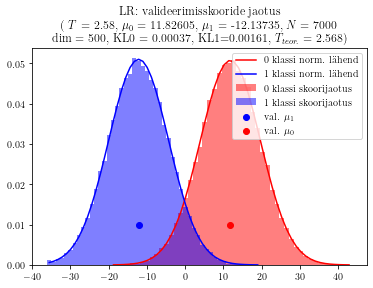

C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)


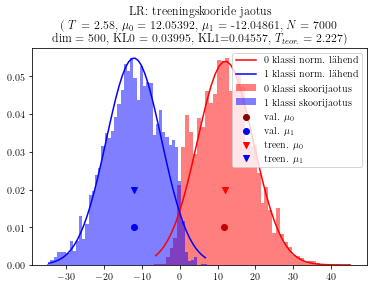

C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3255670642.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq0, _ = np.histogram(meta1, binners, normed = True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3255670642.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq1, _ = np.histogram(meta2, binners, normed = True)


stds: 7.38218994210686 7.271987000645796
stds: 7.86476388179406 7.822997492079624


C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3255670642.py:30: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq0, _ = np.histogram(meta1, binners, normed = True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3255670642.py:31: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  freq1, _ = np.histogram(meta2, binners, normed = True)


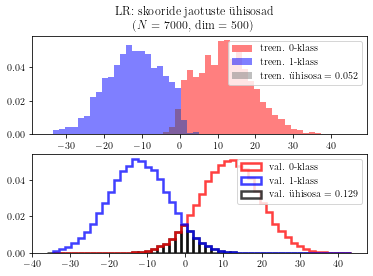

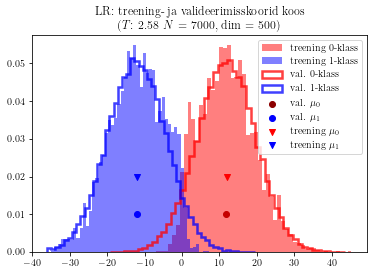

<Figure size 432x288 with 0 Axes>

In [601]:

mod = "LR"
i = -5
test = "%s_%s_500_new"%(mod,i)
a,b = get_jaotus(distr_of_scores_te,i ,y_val,"%s: valideerimis"%(mod),"te" )
get_jaotus(distr_of_scores_tr,i ,y_samps[i],"%s: treening"%(mod),"tr" , True, a, b, 50)
intersec(distr_of_scores_tr, distr_of_scores_te, i, y_samps[i], y_val, "", "tr_te",)
get_koos_jaotused(distr_of_scores_tr, distr_of_scores_te, i, y_samps[i], y_val, "%s: treening- ja valideerimisskoorid koos"%(mod), "tr_te", )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [0.00603508 0.14440798 0.24805825 0.34864867 0.44761055 0.55255331
 0.65545688 0.75059582 0.85493197 0.99416053]


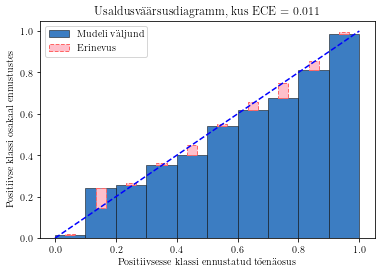

0.011

<Figure size 432x288 with 0 Axes>

In [435]:
probs =  softmax(distr_of_scores_tr[-1].T,0.75)
rel_diag(10 ,probs, y_samps[-1], title_save= "rel_te_vahemike_arv_1%s" % (test))


#plt.savefig("log_reg_enne_c_1.png")

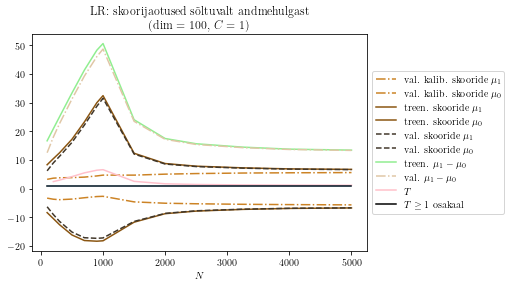

In [617]:
# datatypes: 1 - kattuvusega oma data; 2 - kattuvuseta oma data; 3 - make_cl
test = 36
#nxs = [1e-7, 0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10, 100,1000,10000,100000,1000_000,1e7]
#nxs = [100,150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 5000] 
#nxs = [100, 200, 300, 500, 700, 900, 1000, 1500, 2000,2500,3250,4000, 5000] 
#nxs = [100, 500,1000, 2000,  3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000] 

cc = nxs
testing = "$N$"
not_test = "dim"
param = n_feat
diff_tr = np.abs(np.array(scores_tr_max) - np.array(scores_tr_min))
diff_te = np.abs(np.array(scores_te_max) - np.array(scores_te_min))


min_diff = (cc[np.argmax(-np.abs(diff_tr - diff_te))],np.min(np.abs(diff_tr - diff_te)))
ch_ind1 = np.argmax(diff_tr > diff_te)
ch_ind2 = np.argmax(diff_te > diff_tr)
change1 = (cc[ch_ind1],diff_te[ch_ind1])
change2 = (cc[ch_ind2],diff_te[ch_ind2])


plt.plot(cc_alter , scores_ca_max, color = "#cc8325", label = "val. kalib. skooride $\mu_1$", linestyle = "-.")
plt.plot(cc_alter, scores_ca_min, color = "#cc8325", label = "val. kalib. skooride $\mu_0$", linestyle = "-.")
plt.plot(cc_alter, scores_tr_max, color = "#8a5511", label = "treen. skooride $\mu_1$")
plt.plot(cc_alter, scores_tr_min, color = "#8a5511", label = "treen. skooride $\mu_0$")
plt.plot(cc_alter, scores_te_max, color = "#403629", linestyle = "--", label = "val. skooride $\mu_1$")
plt.plot(cc_alter, scores_te_min, color = "#403629",  linestyle = "--",label = "val. skooride $\mu_0$") #label = "ratio of t > 1")
plt.plot(cc_alter, diff_tr, color = "lightgreen",  label = "treen. $\mu_1 - \mu_0$")
plt.plot(cc_alter, diff_te, color = "#e0c7a6", linestyle = "-.", label = "val. $\mu_1 - \mu_0$") #label = "ratio of t > 1")
plt.plot(cc[1:], avg_res[1:], color = "pink", label = "$T$" )
plt.plot(cc, ratios, color = "black", label= "$T \geq 1$ osakaal")
#plt.scatter(min_diff[0], min_diff[1], color = "purple")
#plt.scatter(change1[0], change1[1], color = "lightgreen")
#plt.scatter(change2[0], change2[1], color = "#e0c7a6")
ch_ind1 = np.argmax(diff_tr > diff_te)
ch_ind2 = np.argmax(diff_te > diff_tr)
change1 = (cc[ch_ind1],diff_te[ch_ind1])
change2 = (cc[ch_ind2],diff_te[ch_ind2])



plt.plot(cc, np.ones(len(cc)), alpha = 0.24)
limitter_v = np.min([np.min(scores_tr_max), np.min(scores_te_max)])
limitter_p = np.max(scores_tr_min)
limmer = np.max([np.max(diff_te),np.max(diff_tr)])
#plt.yscale("log")
#plt.xscale("log")
#plt.ylim((-5,15))
plt.xlabel("%s" % (testing))
#plt.legend(("train_acc", "test_acc", "t > 1 ratio"))
if mod == "LR":
    title = "%s: skoorijaotused sõltuvalt andmehulgast \n (dim = %s, $C = 1$)" % ( mod, n_feat)
else:
    title = "%s: skoorijaotused sõltuvalt andmehulgast \n (dim = %s)" % ( mod, n_feat)
plt.title(title)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("%s_distr_v_data_%s.png" % (mod,test), bbox_inches='tight', dpi = 300)
plt.show()

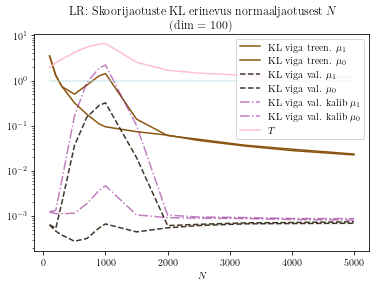

In [618]:
plt.plot(cc_alter, kl_tr_1, color = "#8a5511", label = "KL viga treen. $\mu_1$")
plt.plot(cc_alter, kl_tr_0, color = "#8a5511", label = "KL viga treen. $\mu_0$")
plt.plot(cc_alter, kl_te_1, color = "#403629", linestyle = "--", label =  "KL viga val. $\mu_1$")
plt.plot(cc_alter, kl_te_0, color = "#403629",  linestyle = "--",label = "KL viga val. $\mu_0$") #label = "ratio of t > 1")
plt.plot(cc_alter, kl_ca_1, color = "purple", linestyle = "-.", label = "KL viga val. kalib $\mu_1$", alpha = 0.5)
plt.plot(cc_alter, kl_ca_0, color = "purple",  linestyle = "-.",label = "KL viga val. kalib $\mu_0$", alpha = 0.5) #label = "ratio of t > 1")


plt.plot(cc, avg_res, color = "pink", label = "$T$" )
plt.plot(cc, np.ones(len(cc)), color = "lightblue", alpha = 0.5)

plt.yscale("log")
#plt.ylim((limitter_v - 0.1,np.max([limitter_p,limmer]) + 0.1))
plt.xlabel("%s" % (testing))
#plt.legend(("train_acc", "test_acc", "t > 1 ratio"))
title = "%s: Skoorijaotuste KL erinevus normaaljaotusest %s  \n (dim = %s)" % (mod,testing, n_feat)
plt.title(title)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.savefig("%s_vs_kl_div_%s.png" % (mod,test), bbox_inches='tight', dpi = 300)
plt.show() 

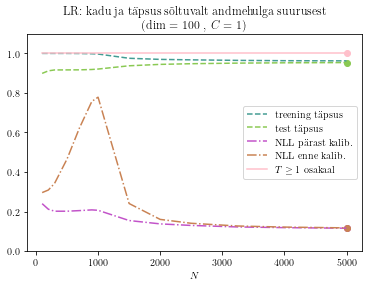

In [620]:
#nxs = [4,8,16,32,64,128,256,512]
#nxs = [20,50,100,250,500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12500] 
#nxs = [70,90,110,130,150, 170, 190, 200]#, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12500] 



#nxs = [2,4,8,16,32,64,128,256, 512, 1024, 2048, 4096, 8000]
#nxs = [1000,10000,100000]
testing = "$N$"
cc = nxs
clusts = 1
max_test = (cc[np.argmax(avg_te_acc)],np.max(avg_te_acc))
min_loss = (cc[np.argmax(-np.array(avg_loss_prst))],np.min(avg_loss_prst))
min_loss_enne = (cc[np.argmax(-np.array(avg_loss_enne))],np.min(avg_loss_enne))
indes = np.argmax(-np.abs(np.ones(len(cc)) - np.array(avg_res)))
temp_one = (cc[indes], ratios[indes])
#max_ece = np.max(np.concatenate((avg_eces_enne, avg_eces_prst)))
plt.plot(cc, avg_tr_acc, color = "#439c93", linestyle = "--", label = "treening täpsus")
plt.plot(cc, avg_te_acc, color = "#8ac953", linestyle = "--", label = "test täpsus")
plt.plot(cc, avg_loss_prst, color = "#c253c9", linestyle = "-.", label = "NLL pärast kalib.")
plt.plot(cc, avg_loss_enne, color = "#c98253", linestyle = "-.", label = "NLL enne kalib.")
plt.plot(cc, ratios, color = "pink", label = "$T \geq 1$ osakaal")
#plt.plot(cc, avg_eces_enne/max_ece, label = "ece_enne")
#plt.plot(cc, avg_eces_prst/max_ece, label = "ece_prst")
plt.scatter(max_test[0], max_test[1], color = "#8ac953")
plt.scatter(min_loss[0], min_loss[1], color = "#c253c9")
plt.scatter(min_loss_enne[0], min_loss_enne[1], color = "#c98253")
plt.scatter(temp_one[0], temp_one[1], color = "pink")


#plt.yscale("log")
plt.ylim((0,1.1))
plt.xlabel("%s" % (testing))
#plt.legend(("train_acc", "test_acc", "t > 1 ratio"))

if mod == "LR":
    title = "%s: kadu ja täpsus sõltuvalt andmehulga suurusest \n (dim = %s , $C=1$)" % (mod, n_feat)
else:
    title = "%s: kadu ja täpsus sõltuvalt andmehulga suurusest \n (dim = %s)" % (mod, n_feat)
plt.title(title)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.savefig("%s_distr_%s.png"%(mod,test), bbox_inches='tight', dpi = 300)

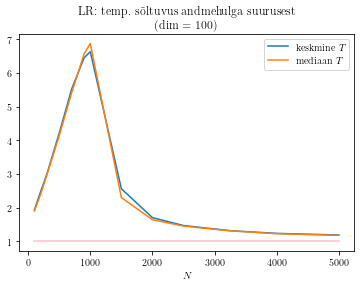

In [621]:
plt.plot(cc, avg_res, label = "keskmine $T$")
plt.plot(cc, median_res, label = "mediaan $T$")
plt.plot(cc, np.ones(len(cc))*1, color = "pink")
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("%s" % (testing))
#plt.ylim((-0.5,3))
#plt.legend(("train_acc", "test_acc", "t > 1 ratio"))
#plt.legend(("train_acc", "test_acc", "loss_after", "loss_before", "t > 1 ratio"))
plt.title("%s: temp. sõltuvus andmehulga suurusest \n (dim = %s)" % (mod, n_feat))
plt.legend()
plt.savefig("%s_distr_temp_%s.png" % (mod,test), dpi = 300)


# Log. reg. 

In [37]:
from sklearn.linear_model import LogisticRegression

In [42]:
def calc_two(scores, amount = 100_000):
  mu = np.mean(scores)
  st = np.std(scores)
  divs = np.array([kl_div(np.random.normal(mu,st,amount), 50, False) for i in range(100)])
  q1 = np.quantile(divs, 0.95)
  q2 = np.quantile(divs, 0.05)
  
  return (q1, q2)

In [40]:
## data generation
def gen_data(n_feat, N = 100_000, eri = False):
  #N = 100000
  epsilon1 = 0#np.array([-0.5,0]) #3:[-0.5,1]; [0.5,-1]
  epsilon2 = 0#np.array([0.5,0])
  
  #n_feat = 100
  ny = 50_000
  nt = 5000
  if eri == True:
    mu_1, mu_2 = np.array([5,1,3,-1,4, 6, 7, 8, 9, -4]), np.array([-5,1,3,-1,4,6, 7, 8, 9, -4])
    sgm = np.identity(10) * np.array([9,1,1,1,1,1,1,1,1,1])
    #sgm = np.array([[4,0,0,0,0],[0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]])
    #mu_1, mu_2 = np.array([2,0]), np.array([-2,0])
    #sgm = np.array([[1,0],[0,1]])
    #mu_1, mu_2 = 2, -2
    #sgm = 4
    
  else:
    mu_1 = np.random.choice([-1,1], n_feat)
    mu_2 = (-1) * mu_1
    #mu_2 = np.random.choice([-1,1], n_feat)
    sgm = np.identity(n_feat)*(n_feat/3)

  inv = np.linalg.inv(sgm)
  w = inv.dot(mu_2 - mu_1)
  b = w.dot(mu_1 + mu_2) * 0.5
  opt_mu = (w,b)
  #mu_1, mu_2 = np.array([1,-1]), np.array([-1,1])
  #mu_1, mu_2 = np.random.randint(-5,5, n_feat), np.random.randint(-10,10,n_feat)
  
  #sgm = np.array([[1,0],[0,1]])

  #sgm = np.identity(len(mu_1)) * np.random.randint(1, 50, len(mu_1))

  distr_1 = np.random.multivariate_normal(mu_1 , sgm, N) #negatives
  val_1 =  np.random.multivariate_normal(mu_1 + epsilon1, sgm, ny)
  test_1 = np.random.multivariate_normal(mu_1 + epsilon1, sgm, nt)

  test_2 = np.random.multivariate_normal(mu_2 + epsilon2, sgm, nt)
  val_2 =  np.random.multivariate_normal(mu_2 + epsilon2, sgm, ny) #positives
  distr_2 = np.random.multivariate_normal(mu_2 , sgm, N)


  y_val = np.concatenate((np.zeros(ny), np.ones(ny)))
  y_train = np.concatenate((np.zeros(N),np.ones(N)))
  y_test= np.concatenate((np.zeros(nt), np.ones(nt)))
  X_train = np.concatenate((distr_1,distr_2))
  X_test = np.concatenate((test_1,test_2))
  X_val = np.concatenate((val_1, val_2))
  return [X_train, y_train, X_test, y_test, X_val, y_val, opt_mu]

In [38]:
def leia_diag(a,jooksev, n):
    if n == 2:
        return np.sqrt(jooksev**2 + a**2) 
    else:
        return leia_diag(a ,  np.sqrt(jooksev**2 + a**2), n - 1)

print(leia_diag(2,2,1000))
print(np.sqrt(1000/3)*3)
diag = [leia_diag(2,2,i+2) for i in range(98)]


63.24555320336758
54.77225575051661


In [27]:
inders = np.arange(2,100,1)
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})
plt.plot(inders, diag, color = "purple", label= "hüperkuubi diagonaal = $2\sqrt{n}$")
plt.plot(inders, np.sqrt(inders/3)*3, color = "black", label = "$3\sigma = 3\sqrt{n/3}$")
plt.plot(inders, inders/3, color = "pink", label = "$\sigma^2 = n/3$")

plt.xlabel("dimensioon")
plt.ylabel("pikkus")
plt.legend()
plt.title("$n$-mõõtmelise kuubi diagonaali pikkuse \n ja meie andmete dispersiooni suhe. \n (kuubi külje pikkus 2)")
#plt.savefig("dimvspik2.png", bbox_inches='tight', dpi = 300)

NameError: name 'diag' is not defined

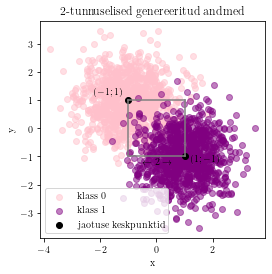

In [265]:
X_train, y_train, X_test, y_test, X_val, y_val, opt_mu = gen_data(2, eri = False)
inds0 = np.random.randint(0, len(X_train)//2, 1000 )
inds1 = np.random.randint(len(X_train)//2, len(X_train) ,1000 )
plt.scatter(X_train[inds0].T[0], X_train[inds0].T[1], color = "pink", label = "klass $0$", alpha = 0.5)
plt.scatter(X_train[inds1].T[0], X_train[inds1].T[1], color = "purple", alpha = 0.5, label = "klass $1$")
plt.plot([-1,-1],[-1,1], color = "grey")
plt.plot([-1,1],[1,1], color = "grey")
plt.plot([1,1],[1,-1], color = "grey")
plt.plot([1,-1],[-1,-1],color = "grey")
plt.text(-.5,-1.3, "$\leftarrow 2 \\rightarrow$")
plt.text(-1.2,1.2,"$(-1; 1)$",horizontalalignment='right')
plt.text(1.2,-1.2,"$(1; -1)$",horizontalalignment='left')
plt.scatter([-1,1],[1,-1], color = "black", label = "jaotuse keskpunktid")
plt.axis('scaled')
plt.xlabel("x")
plt.ylabel("y")
plt.title("$2$-tunnuselised genereeritud andmed")
plt.legend()
plt.savefig("andmed_gen.png", dpi = 300)

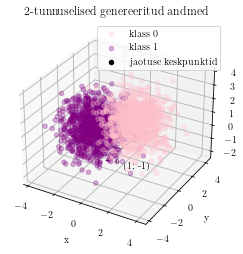

In [236]:
X_train, y_train, X_test, y_test, X_val, y_val, opt_mu = gen_data(3, eri = False)
inds0 = np.random.randint(0, len(X_train)//2, 1000 )
inds1 = np.random.randint(len(X_train)//2, len(X_train) ,1000 )
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(X_train[inds0].T[0], X_train[inds0].T[1], X_train[inds0].T[2],color = "pink", label = "klass 0", alpha = 0.3)
ax.scatter(X_train[inds1].T[0], X_train[inds1].T[1],X_train[inds0].T[2], color = "purple", alpha = 0.3, label = "klass 1")
ax.plot([-1,-1],[-1,1], color = "grey")
ax.plot([-1,1],[1,1], color = "grey")
ax.plot([1,1],[1,-1], color = "grey")
ax.plot([1,-1],[-1,-1],color = "grey")
ax.text(-.65,-1.3,-1.3, "<--2-->")
ax.text(-1.2,1.2,-1.3,"(-1; 1)",horizontalalignment='right')
ax.text(1.2,-1.2,-1.3,"(1; -1)",horizontalalignment='left')
ax.scatter([-1,1],[1,-1],[-1,1], color = "black", label = "jaotuse keskpunktid")
#plt.axis('scaled')
plt.xlabel("x")
plt.ylabel("y")
plt.title("2-tunnuselised genereeritud andmed")
ax.legend()
#ax.savefig("andmed_gen.png")

In [661]:
n = 100
n_feat = 10
res = []
#nxs = [1024,1200, 1500, 1800,2048,4096,8192]
nxs = [100, 200, 300, 500, 700, 900, 1000, 1500, 2000,2500,3250,4000, 5000] 
#nxs = [1000, 2000,  3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000] 



#nxs = [512, 1024, 2048, 4096]
#nxs = [25, 50, 128,256, 512, 1024, 2048, 4096] #8000, 16000, 32000, 64000, 128000]
#nx = 100
#cc = [1e-7, 0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10, 100,1000,10000,100000,1000_000,1e7]
#nx = 500
ratio_of_intuition = np.zeros(len(nxs))
#cc = [10]
#c = 10
eps1 = []
stds = []
eps2 = []
avg_res = []
median_res = []
eces = []
avg_eces_enne = []
avg_eces_prst = []
ratios = []
avg_tr_acc = []
avg_te_acc = []
avg_loss_enne = []
avg_loss_prst = []
y_samps = []
distr_of_scores_tr = []
distr_of_scores_te = []
weights = []
biases = []
ratios_bigger = []
scores_tr_max = []
scores_tr_min = []
scores_te_max = []
scores_te_min = []
scores_ca_max = []
scores_ca_min = []
kl_tr_1 = []
kl_tr_0 = []
kl_te_1 = []
kl_te_0 = []
kl_ca_1 = []
kl_ca_0 = []
jt = 0
kl_tr_1_inters = []
kl_tr_0_inters = []
kl_te_1_inters = []
kl_te_0_inters = []
cc_alter= []
X_train, y_train, X_test, y_test, X_val, y_val, opt_mu = gen_data(n_feat, eri = False)

opt_buf = sigmoid(opt_mu[0].dot(X_train.T) + opt_mu[1],1).reshape((-1,1))
opt_tr = to_logits(np.concatenate((1 - opt_buf, opt_buf), axis = 1))
opt_11_tr = np.mean(opt_tr.T[1][y_train == 1])
opt_01_tr = np.mean(opt_tr.T[0][y_train == 1])
opt_10_tr = np.mean(opt_tr.T[1][y_train == 0])
opt_00_tr = np.mean(opt_tr.T[0][y_train == 0])


#print(opt_1_tr, opt_0_tr)
for j in tqdm.tqdm(range(len(nxs))):
    n_true = n
    #c = cc[j]
    c = nxs[j]
    nx = nxs[j]
    res = []
    eces_enne = []
    tr_acc = []
    te_acc = []
    eces_prst = []
    loss_enne = []
    loss_prst = []
    
    for i in range(n):
        #samp_1 = distr_1[np.random.randint(0,len(distr_1),nx)]
        #samp_2 = distr_2[np.random.randint(0,len(distr_2),nx)]
        
        #ind = np.random.randint(0, len(X_train), nx)
        #samp_x = X_train[ind]
        #samp_y = y_train[ind]

        ind_1 = np.random.randint(0, len(X_train)//2, nx//2)
        ind_2 = np.random.randint(len(X_train)//2, len(X_train), nx//2)
        ind = np.concatenate((ind_1,ind_2))
        #ind = np.random.randint(0, len(X_train), nx)
        samp_x = X_train[ind]
        samp_y = y_train[ind]
        #clf = LogisticRegression(penalty = "l2",C = 1,max_iter = 10000, tol = 1e-9).fit(samp_x, samp_y)
        clf = LogisticRegression(penalty = "none", max_iter = 10000, tol = 1e-9).fit(samp_x, samp_y)


        confidences = clf.predict_proba(X_val)
        confidences_tr = clf.predict_proba(samp_x) 
        confidences_te = clf.predict_proba(X_test)
        #print(confidences[0])

        logits = to_logits(np.where(confidences == 0, 1e-8, confidences))
        logits_test = to_logits(np.where(confidences_te == 0, 1e-8, confidences_te))
        logits_train = to_logits(np.where(confidences_tr == 0, 1e-8, confidences_tr))
        #logits = np.where(abs(logits) > 15, np.sign(logits)*15, logits)
        #logits_test = np.where(abs(logits_test) > 15, np.sign(logits_test)*15, logits_test)
        #logits_train = np.where(abs(logits_train) > 15, np.sign(logits_train)*15, logits_train)
        temperature = cal_methods_slim.TemperatureScaling()
        #temp_train.fit(logits_train, samp_y)
        #conf2 = temperature.predict(logits)
        dd_te = logits
        dd_tr = logits_train
        temperature.fit(dd_te, y_val)
        #print(temperature.temp)
        dd_ca = dd_te/temperature.temp
        #samp = np.argmax(confidences_tr,axis=1)
        #val = np.argmax(confidences,axis=1)
        vahe_tr_1_buf = (dd_tr.T[0] - dd_tr.T[1])[samp_y== 1]
        vahe_tr_0_buf = (dd_tr.T[0] - dd_tr.T[1])[samp_y== 0]
        vahe_te_1_buf = (dd_te.T[0] - dd_te.T[1])[y_val == 1]
        vahe_te_0_buf = (dd_te.T[0] - dd_te.T[1])[y_val == 0]
        vahe_ca_1_buf = (dd_ca.T[0] - dd_ca.T[1])[y_val == 1]
        vahe_ca_0_buf = (dd_ca.T[0] - dd_ca.T[1])[y_val == 0]

        #print(np.mean(dd_tr.T[0]))
        #print(np.mean(dd_tr.T[1]))

#       dd_tr.T[0][samp_y == 1] = dd_tr.T[0][samp_y == 1] - (np.mean(dd_tr.T[0][samp_y == 1]) - opt_01_tr)
#       dd_tr.T[0][samp_y == 0] = dd_tr.T[0][samp_y == 0] - (np.mean(dd_tr.T[0][samp_y == 0]) - opt_00_tr)
#       dd_tr.T[1][samp_y == 1] = dd_tr.T[1][samp_y == 1] - (np.mean(dd_tr.T[1][samp_y == 1]) - opt_11_tr)
#       dd_tr.T[1][samp_y == 0] = dd_tr.T[1][samp_y == 0] - (np.mean(dd_tr.T[1][samp_y == 0]) - opt_10_tr)
#       dd_te.T[0][y_val == 1] = dd_te.T[0][y_val == 1] - (np.mean(dd_te.T[0][y_val == 1]) - opt_01_tr)
#       dd_te.T[0][y_val == 0] = dd_te.T[0][y_val == 0] - (np.mean(dd_te.T[0][y_val == 0]) - opt_00_tr)
#       dd_te.T[1][y_val == 1] = dd_te.T[1][y_val == 1] - (np.mean(dd_te.T[1][y_val == 1]) - opt_11_tr)
#       dd_te.T[1][y_val == 0] = dd_te.T[1][y_val == 0] - (np.mean(dd_te.T[1][y_val == 0]) - opt_10_tr)



        if i == 0:
            weights.append(clf.coef_/n)
            biases.append(clf.intercept_ / n)
            distr_of_scores_te.append(dd_te)
            distr_of_scores_tr.append(dd_tr)

            
            kl_tr_1_inters.append(calc_two(vahe_tr_1_buf, len(samp_y)))
            kl_tr_0_inters.append(calc_two(vahe_tr_0_buf, len(samp_y)))
            kl_te_1_inters.append(calc_two(vahe_te_1_buf))
            kl_te_0_inters.append(calc_two(vahe_te_0_buf))


            scores_tr_max.append(np.mean(vahe_tr_1_buf))
            scores_tr_min.append(np.mean(vahe_tr_0_buf))
            scores_te_max.append(np.mean(vahe_te_1_buf))
            scores_te_min.append(np.mean(vahe_te_0_buf))
            scores_ca_max.append(np.mean(vahe_ca_1_buf))
            scores_ca_min.append(np.mean(vahe_ca_0_buf))

            kl_tr_1.append(kl_div(vahe_tr_1_buf, 50, pic = False))
            kl_tr_0.append(kl_div(vahe_tr_0_buf, 50, pic = False))
            kl_te_1.append(kl_div(vahe_te_1_buf, 50, pic = False))
            kl_te_0.append(kl_div(vahe_te_0_buf, 50, pic = False))
            kl_ca_1.append(kl_div(vahe_ca_1_buf, 50, pic = False))
            kl_ca_0.append(kl_div(vahe_ca_0_buf, 50, pic = False))

        else:
            weights[jt] += clf.coef_ 
            biases[jt] += clf.intercept_ 
            distr_of_scores_te[jt] += dd_te
            distr_of_scores_tr[jt] = np.array([np.concatenate((distr_of_scores_tr[jt].T[0], dd_tr.T[0])),
                                            np.concatenate((distr_of_scores_tr[jt].T[1], dd_tr.T[1]))]).T

            scores_tr_max[jt] += np.mean(vahe_tr_1_buf)
            scores_tr_min[jt] += np.mean(vahe_tr_0_buf)
            scores_te_max[jt] += np.mean(vahe_te_1_buf)
            scores_te_min[jt] += np.mean(vahe_te_0_buf)
            scores_ca_max[jt] += np.mean(vahe_ca_1_buf)
            scores_ca_min[jt] += np.mean(vahe_ca_0_buf)

            kl_tr_1[jt] += (kl_div(vahe_tr_1_buf, 50, pic = False))
            kl_tr_0[jt] += (kl_div(vahe_tr_0_buf, 50, pic = False))
            kl_te_1[jt] += (kl_div(vahe_te_1_buf, 50, pic = False))
            kl_te_0[jt] += (kl_div(vahe_te_0_buf, 50, pic = False))
            kl_ca_1[jt] += (kl_div(vahe_ca_1_buf, 50, pic = False))
            kl_ca_0[jt] += (kl_div(vahe_ca_0_buf, 50, pic = False))
    
        #w,b = wb_multi(samp_1, samp_2, sgm)
        #confidences = np.array(LDA(np.concatenate((val_1, val_2)), w, b))
        #confidences_tr = np.array(LDA(np.concatenate((samp_1, samp_2)), w, b))
        #logits = to_logits(confidences)
        #temperature = cal_methods_slim.TemperatureScaling()
        #temperature.fit(logits.T, val_y)
        #conf2 = temperature.predict(logits.T)
        #calibrated = temperature.transform(confidences.T) 
        diff_tr = np.abs(np.mean(vahe_tr_1_buf) - np.mean(vahe_tr_0_buf))
        diff_te = np.abs(np.mean(vahe_te_0_buf) - np.mean(vahe_te_1_buf))

        ratio_of_intuition[jt] += (np.abs(diff_tr - diff_te) > 0 and temperature.temp >= 1)/n
        res.append(temperature.temp)
        loss_enne.append(temperature._loss_fun(1, logits_test, y_test))
        loss_prst.append(temperature._loss_fun(None, logits_test, y_test) )
        #eces_enne.append(rel_diag(10, confidences, y_test, supress = True))
        #eces_prst.append(rel_diag(10, conf2, y_test, supress = True))
        #print(np.argmax(confidences_tr,axis=1))
        te_acc.append(clf.score(X_val, y_val))
        tr_acc.append(clf.score(samp_x, samp_y))
        #t.append(np.mean(distr_1)/mu_1)
        #eps1.append(mu_1 - np.mean(distr_1))
        #eps2.append(mu_2 - np.mean(distr_2))
    y_samps.append(samp_y)
    weights[jt] = weights[jt]/n_true
    biases[jt] = biases[jt]/n_true
    distr_of_scores_te[jt] = distr_of_scores_te[jt] / n_true
    scores_tr_max[jt] = scores_tr_max[jt]/n_true
    scores_tr_min[jt] = scores_tr_min[jt]/n_true
    scores_te_max[jt] = scores_te_max[jt]/n_true
    scores_te_min[jt] = scores_te_min[jt]/n_true
    scores_ca_max[jt] = scores_ca_max[jt]/n_true
    scores_ca_min[jt] = scores_ca_min[jt]/n_true
    kl_tr_1[jt] = kl_tr_1[jt]/n_true  
    kl_tr_0[jt] = kl_tr_0[jt]/n_true
    kl_te_1[jt] = kl_te_1[jt]/n_true
    kl_te_0[jt] = kl_te_0[jt]/n_true
    kl_ca_1[jt] = kl_ca_1[jt]/n_true
    kl_ca_0[jt] = kl_ca_0[jt]/n_true
    jt += 1
    cc_alter.append(c)


    avg_loss_enne.append(np.mean(np.array(loss_enne)))
    avg_loss_prst.append(np.mean(np.array(loss_prst)))
    avg_res.append(np.mean(np.array(res)))
    stds.append(np.std(np.array(res)))
 
    #avg_eces_enne.append(np.mean(np.array(eces_enne)))
    #avg_eces_prst.append(np.mean(np.array(eces_prst)))kkkkkkk
    res = np.array(res)
    ratios.append(np.mean(res > 1))
    avg_te_acc.append(np.mean(np.array(te_acc)))
    avg_tr_acc.append(np.mean(np.array(tr_acc)))
    median_res.append(np.median(np.array(res)))

  0%|          | 0/13 [00:00<?, ?it/s]C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\AppData\Local\Temp/ipykernel_4592/3135534920.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.histogram(scores, bins, normed =True)
C:\Users\rooben\AppData\Local\Te

In [916]:
word_nn = """0.752\pm0.045                    & 0.733\pm0.024                    & 0.764\pm0.041           
2.288\pm0.264                         & 1.804\pm0.1                         & 1.591\pm0.085   
5.232\pm0.737                         & 2.822\pm0.141                         &  2.259\pm0.167"""
word_nn_perc = """0\%                    & 0\%                     & 0\%                 
  100\%                  & 100\%                       &    100\%      
  100\%                       &   100\%                       & 100\%  """

word_lr_perc = """90\%                    & 77\%                     & 65\%    &  62\%  & 54\%            
 100\%   &  100\% &  100\%                      & 100\%                         & 97\%  
100\%     &  100\% &  100\%                     & 100\%                         &  100\%"""

word_lr = """1.247\pm0.162         & 1.118\pm0.144          & 1.048\pm0.098       &1.021\pm0.064 &1.007\pm0.036      
2.007\pm0.296           & 4.156\pm0.805            &  1.779\pm0.480   &1.194\pm0.081 & 1.088\pm0.045    
  1.931\pm0.209         &4.215\pm0.569            & 6.631\pm1.043  &1.465\pm0.156  &1.185\pm0.057       """

word_lda_perc = """ 94\%                    & 80\%                     & 70\%                
  100\%                        & 100\%                         & 100\%    
 100\%                         & 100\%                         &  100\%   """

word_lda = """ 1.347\pm 0.211                    & 1.063\pm0.081                     & 1.021\pm0.050       
6.074\pm1.708                        &1.357\pm0.108                          &  1.17\pm0.058 
  807\pm213.6                        &  1.826\pm0.159                        & 1.34\pm0.071  """

word_lr_none = """ 33.7\pm66.3      & 1.209\pm0.205      & 1.101\pm0.119          & 1.038\pm0.063 & 1.021\pm0.041 
12.42\pm2.38     &59.2\pm48.9   &  1.782\pm0.502   & 1.165\pm0.081 & 1.073\pm0.046            
  7.9\pm0.91      &18.84\pm6.59            & 82.24\pm49.92 & 1.496\pm0.171 & 1.199\pm0.057      """

word_lr_none_perc = """99\%                    & 91\%                     & 78\%               & 77\% & 66\%   
 100\%                        & 100\%                         & 100\%  &99\%&94\%       
100\%                         & 100\%                         &  100\% & 100\% & 100\%  """

def to_n_arr(word):
    word = word.split("\n")
    nrs = np.array([float(a.strip().split("\\")[0])for w in word for a in w.split("&")]).reshape((3,5))
    words = []
    for w in word:
      for a in w.split("&"):
        buf =  a.strip().split("\pm")

        words.append("\centering$" + buf[0]+ "$\\newline\n" + "$\\pm$" + "\\newline\n$" + buf[1] +"$")
    word = np.array(words).reshape((3,5))
    #word = ["$\mathbf{" + a.strip()+"}$" for w in word for a in w.split("&")]
    #word = np.array(word).reshape((3,5))
    return word, nrs

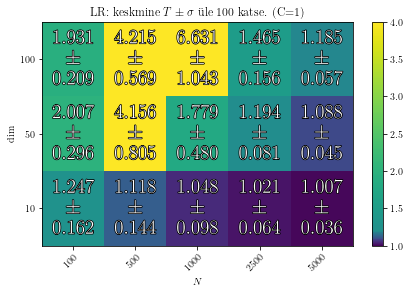

In [919]:
from matplotlib import colors
import matplotlib.patheffects as PathEffects
vegetables = [10,50,100]
farmers = [100,500,1000,2500,5000]
mod = "LR"
test = "0"
harvest2 = np.array([["$\mathbf{1.247\pm0.162}$", "$1.118\pm0.144$", "$1.048\pm0.098$","$1.021\pm0.064$","$1.007\pm0.036$"],
                    ["$2.007\pm0.296$","$4.156\\pm0.805$","$1.779\pm0.480$","$1.194\pm0.081$","$1.088\pm0.045$"],
                    ["$1.931\pm0.209$","$4.215\pm0.569$","$6.631\pm1.043$","$1.465\pm0.156$","$1.185\pm0.057$"]])
harvest = np.array([[1.247, 1.118, 1.048,1.021,1.007],
                    [2.007,4.156,1.779,1.194,1.088],
                    [1.931,4.215,6.631,1.465,1.185]])

harvest2, harvest = to_n_arr(word_lr)
#harvest = np.sqrt(harvest)
fig, ax = plt.subplots()
#im = ax.imshow(harvest,vmin=0, vmax=6)
divnorm=colors.TwoSlopeNorm(vmin=1, vcenter=1.2, vmax=4)
#divnorm=colors.TwoSlopeNorm(vmin=50, vcenter=75, vmax=100)


heatmap = ax.pcolormesh(harvest,norm=divnorm)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers))+0.5)
ax.set_xticklabels(labels=farmers)
ax.set_yticks(np.arange(len(vegetables))+0.5)
ax.set_yticklabels(labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j + 0.5, i + 0.5, harvest2[i, j],
                       ha="center", va="center", color="w", size = 20, )# backgroundcolor = "black")
        text.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='black')])
plt.draw()


#ax.set_title("%s: $T > 1$ osakaal üle 100 katse. (C=1)"%(mod))
ax.set_title("%s: keskmine $T\pm\sigma$ üle 100 katse. (C=1)"%(mod))


fig.tight_layout()

ax.set_xlabel("$N$")
ax.set_ylabel("dim")
plt.colorbar(heatmap)
plt.savefig("%s_heatmap_%s.png" % (mod,test), bbox_inches='tight', dpi = 300)

plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [0.00979342 0.14415926 0.24726619 0.34743952 0.44818843 0.54950408
 0.65236079 0.75269902 0.85632609 0.99015985]


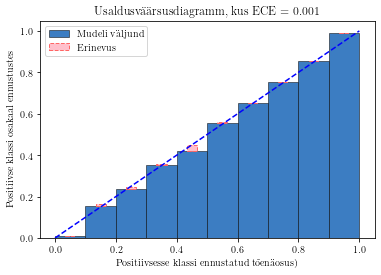

0.001

<Figure size 432x288 with 0 Axes>

In [400]:
probs =  softmax(distr_of_scores_te[-5].T,1)
rel_diag(10 ,probs, y_val, title_save= "rel_tr_spec_%s" % (test))


#plt.savefig("log_reg_enne_c_1.png")